In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load Flier Response Data
flierresponse = pd.read_csv("D:\Academics\BTech\DSC4.51015_StatisticalModeling-1\Session 06\FlierResponse.csv")

# Convert Response column to factor
flierresponse['Response'] = pd.factorize(flierresponse['Response'])[0]

In [9]:
# Logistic Regression Model
X = flierresponse[['Age']]
y = flierresponse['Response']
flierresponseglm = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial()).fit()
print(flierresponseglm.summary2())

              Results: Generalized linear model
Model:              GLM              AIC:            53.9366  
Link Function:      Logit            BIC:            -357.0243
Dependent Variable: Response         Log-Likelihood: -24.968  
Date:               2024-03-26 14:58 LL-Null:        -61.578  
No. Observations:   92               Deviance:       49.937   
Df Model:           1                Pearson chi2:   46.3     
Df Residuals:       90               Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
---------------------------------------------------------------
const      20.4078    4.5233   4.5117  0.0000  11.5423  29.2734
Age        -0.4259    0.0948  -4.4921  0.0000  -0.6118  -0.2401



In [16]:
# Predict probability for Age=50
nd = pd.DataFrame({'Age': [50]})
print("Shape of nd_array:", nd_array.shape)
print("Shape of flierresponseglm.params:", flierresponseglm.params.shape)

Shape of nd_array: (1, 1)
Shape of flierresponseglm.params: (2,)


In [18]:
# Construct the design matrix with a constant term manually
nd_array = np.column_stack((np.ones_like(nd['Age']), nd['Age']))

# Predict the response for the new data
print(flierresponseglm.predict(nd_array))

[0.29152877]


In [20]:
# Construct the design matrix with a constant term manually
nd_array = np.column_stack((np.ones_like(nd['Age']), nd['Age']))

# Predict the response for the new data with transform=False
print(flierresponseglm.predict(nd_array, transform=False))

[0.29152877]


In [22]:
print(flierresponseglm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                   92
Model:                            GLM   Df Residuals:                       90
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24.968
Date:                Tue, 26 Mar 2024   Deviance:                       49.937
Time:                        21:02:50   Pearson chi2:                     46.3
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5488
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4078      4.523      4.512      0.0

In [24]:
# Print log-likelihood of the model
print(flierresponseglm.llf)

-24.96831445537559


In [25]:
print(flierresponseglm.deviance)
print(flierresponseglm.aic)

49.93662891075118
53.93662891075118


# Case Study: Framingham Heart Study

In [41]:
# Read the Framingham dataset
framingham = pd.read_csv(r"D:\Academics\BTech\DSC4.51015_StatisticalModeling-1\Session 06\framingham.csv")

In [45]:
# Remove rows with missing values from the DataFrame
framingham = framingham.dropna()

print(framingham.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB
None


In [42]:
# Randomly split the data into training and testing sets
train, test = train_test_split(framingham, test_size=0.3, random_state=123)

In [43]:
# Calculate the proportion of TenYearCHD in the training dataset
train_proportion = train['TenYearCHD'].sum() / len(train)

# Calculate the proportion of TenYearCHD in the testing dataset
test_proportion = test['TenYearCHD'].sum() / len(test)

print("Proportion of TenYearCHD in the training dataset:", train_proportion)
print("Proportion of TenYearCHD in the testing dataset:", test_proportion)

Proportion of TenYearCHD in the training dataset: 0.147265625
Proportion of TenYearCHD in the testing dataset: 0.16393442622950818


In [44]:
# Logistic Regression Model
framingham1 = sm.GLM(train['TenYearCHD'], sm.add_constant(train.drop(columns=['TenYearCHD'])),
                     family=sm.families.Binomial()).fit()
print(framingham1.summary2())

                Results: Generalized linear model
Model:               GLM              AIC:            1919.4621  
Link Function:       Logit            BIC:            -18077.2457
Dependent Variable:  TenYearCHD       Log-Likelihood: -943.73    
Date:                2024-03-27 11:35 LL-Null:        -1069.9    
No. Observations:    2560             Deviance:       1887.5     
Df Model:            15               Pearson chi2:   2.45e+03   
Df Residuals:        2544             Scale:          1.0000     
Method:              IRLS                                        
-----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------
const           -8.9157   0.8674 -10.2782 0.0000 -10.6158 -7.2155
male             0.5311   0.1324   4.0102 0.0001   0.2715  0.7907
age              0.0649   0.0081   8.0364 0.0000   0.0490  0.0807
education       -0.0716   

In [46]:
# Check for multicollinearity

X = framingham.drop(columns=['TenYearCHD']+['male']+['currentSmoker']+['BPMeds']+
                    ['prevalentStroke']+['prevalentHyp']+['diabetes'], axis=1)
# Add a constant term for the intercept
X_with_constant = sm.add_constant(X)
# Calculate VIF (excluding the constant term)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) 
                   for i in range(1, X_with_constant.shape[1])]

print("VIF:")
print(vif_data)

VIF:
     Variable       VIF
0         age  1.335089
1   education  1.053133
2  cigsPerDay  1.049092
3     totChol  1.108764
4       sysBP  3.126199
5       diaBP  2.875258
6         BMI  1.207163
7   heartRate  1.065791
8     glucose  1.038740


In [50]:
# Accuracy on the training set
predictTrain1 = framingham1.predict(sm.add_constant(train.drop(columns=['TenYearCHD'])))
print("Confusion Matrix_Train:")
print(confusion_matrix(train['TenYearCHD'], predictTrain1 > 0.5))
print("Accuracy_Train:", accuracy_score(train['TenYearCHD'], predictTrain1 > 0.5))

# Accuracy on Test Set
predictTest1 = framingham1.predict(sm.add_constant(test.drop(columns=['TenYearCHD'])))
print("Confusion Matrix_Test:")
print(confusion_matrix(test['TenYearCHD'], predictTest1 > 0.5))
print("Accuracy_Test:", accuracy_score(test['TenYearCHD'], predictTest1 > 0.5))

Confusion Matrix_Train:
[[2169   14]
 [ 346   31]]
Accuracy_Train: 0.859375
Confusion Matrix_Test:
[[913   5]
 [166  14]]
Accuracy_Test: 0.8442622950819673


In [53]:
# Displaying confusion matrix with row and column labels

threshold = 0.5  # Example threshold to be adjusted as needed
predicted_labels = (predictTrain1 > threshold).astype(int)

# Create a DataFrame containing true and predicted labels
confusion_data = pd.DataFrame({'Actual': train['TenYearCHD'], 'Predicted': predicted_labels})

# Calculate confusion matrix using crosstab
conf_matrix = pd.crosstab(confusion_data['Actual'], confusion_data['Predicted'], rownames=['Actual'], colnames=['Predicted'])

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
Predicted     0   1
Actual             
0          2169  14
1           346  31


In [120]:
# Confusion matrix on Test Data at various thresholds

threshold = 0.1  # Example threshold to be adjusted as needed
predicted_labels = (predictTest1 > threshold).astype(int)

# Create a DataFrame containing true and predicted labels
confusion_data = pd.DataFrame({'Actual': test['TenYearCHD'], 'Predicted': predicted_labels})

# Calculate confusion matrix using crosstab
conf_matrix = pd.crosstab(confusion_data['Actual'], confusion_data['Predicted'], rownames=['Actual'], colnames=['Predicted'])

print("Confusion Matrix with threshold of", threshold)
print(conf_matrix)

Confusion Matrix with threshold of 0.1
Predicted    0    1
Actual             
0          442  476
1           33  147


# Build another model assuming Education to be a nominal variable

In [102]:
# Read the Framingham dataset
framinghamEd = pd.read_csv(r"D:\Academics\BTech\DSC4.51015_StatisticalModeling-1\Session 06\framingham.csv")
# Remove rows with missing values from the DataFrame
framinghamEd = framinghamEd.dropna()
print(framinghamEd.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB
None


In [103]:
# Convert 'education' to categorical
framinghamEd['education'] = framinghamEd['education'].astype('category')
# Create dummy variables for 'education'
education_dummies = pd.get_dummies(framinghamEd['education'], prefix='education', drop_first=True)
# Concatenate dummy variables with the original DataFrame
framinghamEd = pd.concat([framinghamEd, education_dummies], axis=1)
# Remove the original 'education' column if needed
framinghamEd = framinghamEd.drop(columns=['education'])
print(framinghamEd.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   currentSmoker    3658 non-null   int64  
 3   cigsPerDay       3658 non-null   float64
 4   BPMeds           3658 non-null   float64
 5   prevalentStroke  3658 non-null   int64  
 6   prevalentHyp     3658 non-null   int64  
 7   diabetes         3658 non-null   int64  
 8   totChol          3658 non-null   float64
 9   sysBP            3658 non-null   float64
 10  diaBP            3658 non-null   float64
 11  BMI              3658 non-null   float64
 12  heartRate        3658 non-null   float64
 13  glucose          3658 non-null   float64
 14  TenYearCHD       3658 non-null   int64  
 15  education_2.0    3658 non-null   bool   
 16  education_3.0    3658 non-null   bool   
 17  education_4.0    36

In [104]:
print(framinghamEd.head())

   male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  education_2.0  education_3.0  education_4.0  
0           0          False          False           T

In [105]:
# Convert boolean columns to integer (0 or 1)
framinghamEd['education_2.0'] = framinghamEd['education_2.0'].astype(int)
framinghamEd['education_3.0'] = framinghamEd['education_3.0'].astype(int)
framinghamEd['education_4.0'] = framinghamEd['education_4.0'].astype(int)

In [106]:
# Check for missing values
print(framinghamEd.isnull().sum())

# Verify data types
print(framinghamEd.dtypes)

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
education_2.0      0
education_3.0      0
education_4.0      0
dtype: int64
male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
education_2.0        int32
education_3.0        int32
education_4.0        int32
dtype: object


In [107]:
# Randomly split the data into training and testing sets
trainEd, testEd = train_test_split(framinghamEd, test_size=0.3, random_state=123)

In [108]:
# Calculate the proportion of TenYearCHD in the training dataset
trainEd_proportion = trainEd['TenYearCHD'].sum() / len(trainEd)

# Calculate the proportion of TenYearCHD in the testing dataset
testEd_proportion = testEd['TenYearCHD'].sum() / len(testEd)

print("Proportion of TenYearCHD in the training dataset:", trainEd_proportion)
print("Proportion of TenYearCHD in the testing dataset:", testEd_proportion)

Proportion of TenYearCHD in the training dataset: 0.147265625
Proportion of TenYearCHD in the testing dataset: 0.16393442622950818


In [109]:
# Logistic Regression Model
framingham2 = sm.GLM(trainEd['TenYearCHD'], sm.add_constant(trainEd.drop(columns=['TenYearCHD'])), 
                     family=sm.families.Binomial()).fit()
print(framingham2.summary2())

                Results: Generalized linear model
Model:               GLM              AIC:            1921.9700  
Link Function:       Logit            BIC:            -18063.0423
Dependent Variable:  TenYearCHD       Log-Likelihood: -942.99    
Date:                2024-03-27 14:25 LL-Null:        -1069.9    
No. Observations:    2560             Deviance:       1886.0     
Df Model:            17               Pearson chi2:   2.46e+03   
Df Residuals:        2542             Scale:          1.0000     
Method:              IRLS                                        
-----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------
const           -8.8713   0.8597 -10.3187 0.0000 -10.5563 -7.1863
male             0.5142   0.1336   3.8500 0.0001   0.2525  0.7760
age              0.0636   0.0081   7.8096 0.0000   0.0476  0.0795
currentSmoker    0.1502   

In [110]:
# Check for multicollinearity

X = framinghamEd.drop(columns=['TenYearCHD']+['male']+['currentSmoker']+['BPMeds']+['prevalentStroke']+['prevalentHyp']
                      +['diabetes']+['education_2.0']+['education_3.0']+['education_4.0'], axis=1)
# Add a constant term for the intercept
X_with_constant = sm.add_constant(X)
# Calculate VIF (excluding the constant term)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(1, X_with_constant.shape[1])]

print("VIF:")
print(vif_data)

VIF:
     Variable       VIF
0         age  1.315494
1  cigsPerDay  1.048542
2     totChol  1.106154
3       sysBP  3.109630
4       diaBP  2.860657
5         BMI  1.190182
6   heartRate  1.062395
7     glucose  1.038703


In [111]:
# Accuracy on the training set
predictTrain2 = framingham2.predict(sm.add_constant(trainEd.drop(columns=['TenYearCHD'])))
print("Confusion Matrix_Train:")
print(confusion_matrix(trainEd['TenYearCHD'], predictTrain2 > 0.5))
print("Accuracy_Train:", accuracy_score(trainEd['TenYearCHD'], predictTrain2 > 0.5))

# Accuracy on Test Set
predictTest2 = framingham2.predict(sm.add_constant(testEd.drop(columns=['TenYearCHD'])))
print("Confusion Matrix_Test:")
print(confusion_matrix(testEd['TenYearCHD'], predictTest2 > 0.5))
print("Accuracy_Test:", accuracy_score(testEd['TenYearCHD'], predictTest2 > 0.5))

Confusion Matrix_Train:
[[2168   15]
 [ 346   31]]
Accuracy_Train: 0.858984375
Confusion Matrix_Test:
[[913   5]
 [166  14]]
Accuracy_Test: 0.8442622950819673


In [113]:
# Test set AUC using FULL MODEL (MODEL 1)
print(roc_auc_score(test['TenYearCHD'], predictTest1))

# Test set AUC using REDUCED MODEL (MODEL 2)
print(roc_auc_score(test['TenYearCHD'], predictTest2))

0.7260288065843621
0.7250847252481238


In [122]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

0.7260288065843621


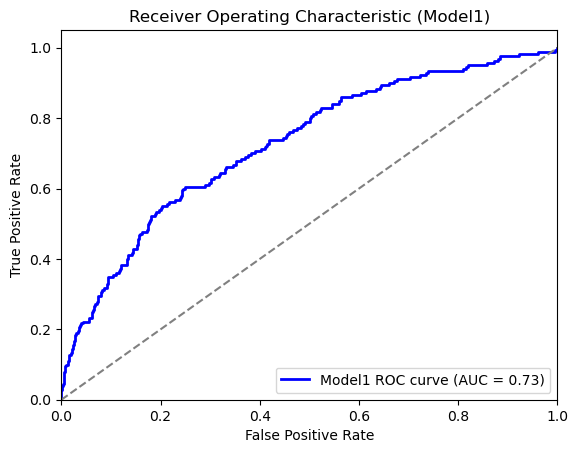

0.7250847252481238


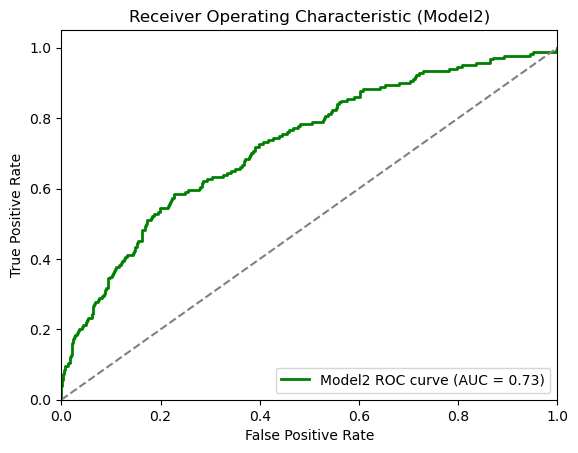

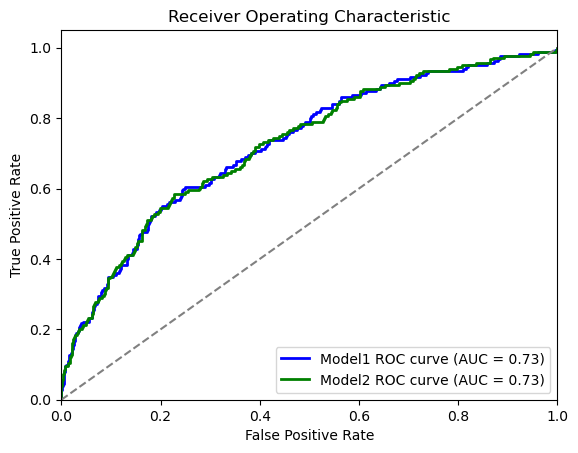

In [123]:
# Test set AUC using MODEL 1
auc1 = roc_auc_score(test['TenYearCHD'], predictTest1)
print(auc1)

fpr1, tpr1, thresholds1 = roc_curve(test['TenYearCHD'], predictTest1)

plt.plot(fpr1, tpr1, color='blue', lw=2, label='Model1 ROC curve (AUC = %0.2f)' % auc1)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Model1)')
plt.legend(loc="lower right")
plt.show()

# Test set AUC using MODEL 2
auc2 = roc_auc_score(testEd['TenYearCHD'], predictTest2)
print(auc2)

fpr2, tpr2, thresholds2 = roc_curve(testEd['TenYearCHD'], predictTest2)

plt.plot(fpr2, tpr2, color='green', lw=2, label='Model2 ROC curve (AUC = %0.2f)' % auc2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Model2)')
plt.legend(loc="lower right")
plt.show()

# Overlay ROC curves
plt.plot(fpr1, tpr1, color='blue', lw=2, label='Model1 ROC curve (AUC = %0.2f)' % auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Model2 ROC curve (AUC = %0.2f)' % auc2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [124]:
# Combine predicted probabilities and actual response
probs_and_actual = pd.DataFrame({'Predicted Probability': predictTest1, 'Actual Response': test['TenYearCHD']})

# Sort by predicted probability in descending order
probs_and_actual_sorted = probs_and_actual.sort_values(by='Predicted Probability', ascending=False)

# Print the first 25 records
print(probs_and_actual_sorted.head(25))

      Predicted Probability  Actual Response
3844               0.922906                1
2007               0.672367                1
2718               0.637595                1
1588               0.613555                1
2930               0.609554                1
590                0.576604                0
604                0.575652                1
249                0.557458                0
1230               0.557357                1
1054               0.549943                0
1079               0.546651                1
2162               0.539469                0
3136               0.531380                1
2187               0.530724                1
4075               0.530574                1
1878               0.515399                1
2600               0.512034                1
926                0.506415                0
2298               0.505908                1
2446               0.488357                0
4040               0.482958                0
522       